In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
from sklearn.linear_model import LinearRegression 

# Dataset

In [3]:
data=pd.read_csv("http://bit.ly/w-data")

In [10]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Distribution of scores

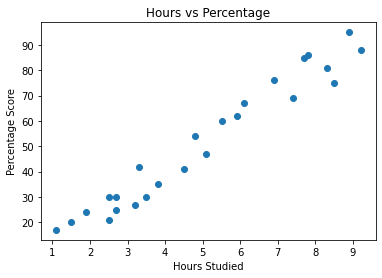

In [14]:
data.plot(x='Hours', y='Scores', style='o',legend=False)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Preparing the data

In [27]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [28]:
# using Scikit-learn method we will train and test the data using train_test_split() method
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.8, random_state=42) 

# Training the algorithm

In [29]:
regression = LinearRegression()  
regression.fit(X_train, y_train) 

print("Training complete.")

Training complete.


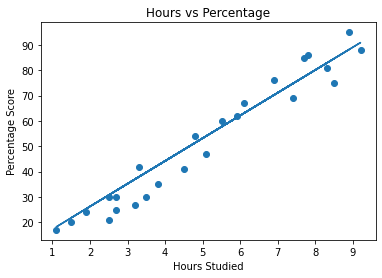

In [30]:
# Plotting the regression line
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Making predictions

After training the model we have to make some prediction to get some information

In [31]:
# Testing data - In Hours
print(X_test) 
# Predicting the scores
y_pred = regression.predict(X_test) 

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]]


# Comparing Actual data vs Predicted data

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,82.841482
1,30,30.746861
2,21,30.746861
3,76,70.266918
4,62,61.285087
5,25,32.543228
6,42,37.932326
7,47,54.099622
8,35,42.423242
9,20,21.765030


In [33]:
print("Training Score :",regression.score(X_train,y_train))
print("Test Score:",regression.score(X_test,y_test))

Training Score : 0.9677436439956412
Test Score: 0.9284138558385431


# What will be predicted score if a student studies for 9.25 hrs/day?

In [36]:
# You can also test with our own data
hours = 9.25
testing = np.array([[hours]])
prediction = regression.predict(testing)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 91.37422170052056


# Evaluate the model

In [37]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.431325916096766
